# Trabajo Práctico 1 - Matrices de Insumo Producto

In [18]:
import sys
sys.path.append('../src/')
import matplotlib.pyplot as plt
from funciones import *

### Consigna 1 - 

El modelo de Leontief plantea que la economía se divide en distintos sectores donde cada uno de ellos genera una determinada cantidad de producción p:
$$ \mathbf{p = (I − A)^{−1}d} $$

Esta fórmula se compone por un vector $d$ de demanda, la matriz $A$ de insumos y la matriz inversa de $(I-A)$, o $L$, que se conoce como la matriz de Leontief, donde las soluciones que podremos obtener respecto a la producción obtenida por cada sector estarán condicionadas principalmente por la invertibilidad de la matriz de Leontief y los valores $d$ de demanda. 


#### Matrices invertibles
Por un lado, que una matriz sea invertible nos asegura que, cuando apliquemos el método de la eliminación gaussiana para obtener una una matriz triangular, vamos a obtener una única solución particular al sistema (SCD). Lo cual es debido a que una matriz invertible tiene todas sus filas linealmente independientes, ningun vector, sea una fila o columna, es combinación de otra y no se anula ninguna fila. Esta característica nos va a permitir poder despejar nuestro sistema y obtener un valor específico por cada una de las variables que tenga, conformando un único vector, nuestra solución.

*a)* En el primer caso la matriz $(I-A)$ es inversible y, en conclusion a lo que se mencionó anteriormente, vamos a tener un sistema compatible determinado, donde existe una única posible solución a este problema:

$$ p = (I − A)^{−1}d $$

Finalmente podemos estimar un vector específico de la cantidad de producción $p$, ligado a los valores $d$ de demanda y la matriz de insumos $A$. 

*b)* En este caso, la demanda es el vector nulo, por lo tanto la producción que obtendremos es también nula. 

$$ (I - A)p=0 \Longrightarrow p=0 $$ 

Esta solución, perteneciente al núcleo de la matriz, es única debido a que la invertibilidad de la matriz. Así, el sistema que queda conformado es un sistema homogéneo compatible determinado.

En otras palabras, que sea invertible nos asegura que tenga una única solución (SCD) que depende particularmente de la demanda $d$. En el segundo caso b) podemos profundizar un poco más ya que esta $d$ está establecida, entonces sabemos cual es esta única solución ($p=0$).


### Matrices no invertibles

Cuando tenemos una matriz no invertible, las filas o columnas de aquella son linealmente dependientes. Frente a ello, podemos hallar dos casos, que no haya solución alguna (SI) o que haya infinitas soluciones al sistema (SCI). Este primer caso ocurre cuando al triangular la matriz en la eliminación gaussiana llegamos a un absurdo. Por otro lado, en el segundo caso, no llegamos a este punto, ya que cuando se anulan las filas, el término independiente también es nulo.

*c)* En este punto, cuando la matriz no es inversible, no podemos asegurar que haya una solución particular, sino que puede que no haya solución (sistema incompatible) o que, de hecho, haya infinitas soluciones (sistema compatible indeterminado).

$$ (I-A)p=d $$

*d)* Por último, al establecer d=0 obtenemos la solución particular p=0, pero la matriz al no ser invertible tiene infinitas soluciones (sistema compatible indeterminado), y el núcleo tiene una dimensión mayor a cero.

$$ (I - A)p=0 $$

---

---

### Consigna 3

Sean $$\mathbf{A = \begin{pmatrix} 0.3 & 0.0 & 0.1 \\ 0.05 & 1.0 & 0.2 \\ 0.1 & 0.15 & 0.1 \end{pmatrix}, \ \ d = \begin{pmatrix} 100 \\ 100 \\ 300 \end{pmatrix}}$$
Entonces, para obtener la producción $\mathbf{p}$ necesaria de cada sector para satisfacer la demanda interna, representada por $\mathbf{A}$ y la demanda externa, representada por $\mathbf{d}$, resolvemos la ecuación del modelo de Leontief:
$$ \mathbf{p = (I-A)^{-1}d} $$
En este proceso usamos funciones que calculan la factorización LU con pivoteo parcial y la inversa de una matriz dada su factorización LU y su matriz de permutación P. 

In [3]:
A = np.array([[0.3,0,0.1],[0.05,1,0.2],[0.1,0.15,0.1]])
d = np.array([[100],[100],[300]])
I = np.eye(3)
L, U, P = calcularLU(I-A)
M = inversaLU(L,U, P)
p = M@d
p

array([[   68.96551724],
       [-5149.42528736],
       [ -517.24137931]])

Obtenemos que $$\mathbf{p \approx \begin{pmatrix} 69 \\ -5149 \\ -517 \end{pmatrix} }$$
En el contexto económico estos valores no tienen sentido, ya que ante una demanda externa positiva la producción debería ser positiva para satisfacerla, lo cual en este caso no se refleja pues los valores de producción de los sectores representados por las filas dos y tres en el vector $\mathbf{p}$ son negativos. Esto sugiere que la aplicación económica limita los valores posibles para $\mathbf{A}$ y $\mathbf{d}$.

Dado que en un contexto económico no deberíamos tener limitaciones en cuanto a la demanda posible a recibir, ya que justamente se busca encontrar la cantidad de producción necesaria para satisfacerla, nos enfocamos en estudiar la matriz $\mathbf{A}$ dada. El modelo de Leontief menciona que $\mathbf{A}$ no es una matriz cualquiera, sino que es la matriz de flujo, significando esto que la columna $j$ representa los insumos requeridos de cada sector $i$ para satisfacer la producción del sector $j$. De esta manera, $\mathbf{A}$ debe representar adecuadamente las proporciones de insumo de cada sector. Si observamos la columna 2 vemos que el sector 2 requiere una unidad de producto del sector 2 para satisfacer la producción del sector 2, es decir que este sector es completamente autosuficiente para su propia producción, lo cual es inusual y puede no ser realista en un modelo económico. Concluimos que el resultado de $\mathbf{p}$ obtenido se debe a que la matriz $\mathbf{A}$ no refleja adecuadamente las dependencias de insumo-producto planteadas por el modelo de Leontief. 


---

### Consigna 4

El modelo de Leontief permite calcular la producción $\mathbf{p}$ requerida en cada sector para cubrir tanto la demanda interna como externa. Esto se basa en resolver una ecuación de la forma $$ \mathbf{p=(I-A)^{-1}d} $$ Donde la matriz $\mathbf{A}$ describe los insumos requeridos por cada sector para generar su producto, $\mathbf{I}$ es la matriz identidad y el vector $\mathbf{d}$ la demanda externa.

Consideremos el caso en el que la demanda externa $\mathbf{d}$ cambia en un $\mathbf{\Delta d} = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$. Entonces, la demanda externa se convierte en: $$ \mathbf{d' = d + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}}$$

Queremos saber cuánto cambia la producción $\mathbf{p}$ como consecuencia de esto.

La nueva producción, correspondiente a la nueva demanda, está dada por: $$ \mathbf{p'=(I-A)^{-1}d'} $$

Entonces la variación de $\mathbf{p}$ es la diferencia entre la nueva producción y la anterior al cambio de la demanda 
$$\mathbf{ \Delta p = p' - p }$$

Sustituyendo las ecuaciones para $\mathbf{p}$ y $\mathbf{p'}$, y tomando factor común $\mathbf{(I-A)^{-1}}$ queda que 
$$\mathbf{\Delta p = (I-A)^{-1}(d'-d) = (I-A)^{-1} \Delta d} $$

Esta ecuación es una consecuencia de la linealidad del modelo, obtenemos que la matriz de Leontief actúa como aplicación lineal que tranforma los cambios en la demanda externa directamente en cambios en la producción. Más aún, como $\mathbf{\Delta d = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}}$ el producto $\mathbf{(I-A)^{-1}\Delta d}$ nos da la tercera columna de la matriz de Leontief. Este hecho nos hace notar que, en general, la columna $\mathbf{i}$ de la matriz de Leontief te dice cuánto debe aumentar la producción en cada sector si hay un incremento unitario en la demanda del sector $\mathbf{i}$. 

---

### Consigna 5

La matriz de coeficientes técnicos $\mathbf{A}$ viene dada por la expresión
$$ \mathbf{A = ZP^{-1}} $$ 
Donde $\mathbf{Z}$ es la matriz de insumos y $\mathbf{ P^{-1} }$ la inversa de la matriz diagonal con el producto total de cada sector. De esta manera se tiene que $a_{ij}= \frac{z_{ij}}{p_{jj}}$

Si tenemos la siguiente economía, caracterizada por su matriz de insumos y su matriz diagonal de producto total:
$$ \mathbf{ Z = \begin{pmatrix} 350 & 0 & 0 \\ 50 & 250 & 150 \\ 200 & 150 & 550 \end{pmatrix}, \ \ P = \begin{pmatrix} 1000 & 0 & 0 \\ 0 & 500 & 0 \\ 0 & 0 & 1000 \end{pmatrix} } $$

Debido a la simplicidad de su estructura, es fácil ver que la inversa de una matriz diagonal existe si ningún elemento de la diagonal es nulo, y en ese caso la inversa es la matriz diagonal cuyos elementos son los recíprocos de la matriz original:  $$ \mathbf{ P^{-1} = \begin{pmatrix} \frac{1}{1000} & 0 & 0 \\ 0 & \frac{1}{500} & 0 \\ 0 & 0 & \frac{1}{1000} \end{pmatrix} }$$

Luego hacemos el producto y obtenemos la matriz A:

$$ \mathbf{ A = \begin{pmatrix} 350 & 0 & 0 \\ 50 & 250 & 150 \\ 200 & 150 & 550 \end{pmatrix} \begin{pmatrix} \frac{1}{1000} & 0 & 0 \\ 0 & \frac{1}{500} & 0 \\ 0 & 0 & \frac{1}{1000} \end{pmatrix} = \begin{pmatrix} \frac{350}{1000} & 0 & 0 \\ \frac{50}{1000} & \frac{250}{500} & \frac{150}{1000} \\ \frac{200}{1000} & \frac{150}{500} & \frac{550}{1000} \end{pmatrix} = \begin{pmatrix} \frac{7}{20} & 0 & 0 \\ \frac{1}{20} & \frac{1}{2} & \frac{3}{20} \\ \frac{1}{5} & \frac{3}{10} & \frac{11}{20} \end{pmatrix}}$$

La matriz de Leontief viene dada por $\mathbf{L := (I-A)^{-1}}$:

$$\mathbf{L = \begin{pmatrix} 1-\frac{7}{20} & 0 & 0 \\ -\frac{1}{20} & 1-\frac{1}{2} & -\frac{3}{20} \\ -\frac{1}{5} & -\frac{3}{10} & 1-\frac{11}{20} \end{pmatrix}^{-1} = \begin{pmatrix} \frac{20}{13} & 0 & 0 \\ \frac{35}{78} & \frac{5}{2} & \frac{5}{6} \\ \frac{115}{117} & \frac{5}{3} & \frac{25}{9} \end{pmatrix} }$$



In [48]:
Z = np.array([[350, 0, 0], [50, 250, 150],[200, 150, 550]])
P = np.array([[1000, 0, 0], [0, 500, 0], [0, 0, 1000]])
I = np.eye(3)

#Obtenemos los coeficientes técnicos
L, U, _ = calcularLU(P)
P_inv = inversaLU(L,U)
A = Z@P_inv

#Obtenemos la matriz de Leontief
L, U, P = calcularLU(I-A)
Leontief = inversaLU(L,U,P)
Leontief

array([[1.53846154, 0.        , 0.        ],
       [0.44871795, 2.5       , 0.83333333],
       [0.98290598, 1.66666667, 2.77777778]])

---

### Consigna 6

La formula (4) nos dice que:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$

Consideremos ahora una variación en $d^{r}$, lo que nos lleva a obtener una nueva demanda $d' ^{r}$. Al hacer esto, debemos tomar en cuenta las posibles variaciones que esto genere sobre $p^{r}$ y $p^{s}$, y que darán lugar a $p'^{r}$ y $p'^{s}$. Con esto en mente, podemos derivar la siguiente expresión ante cambios en $d^{r}$:    

 $$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
p'^{r} \\
p'^{s}
\end{pmatrix} =
\begin{pmatrix}
d'^{r} \\
d^{s}
\end{pmatrix}
$$

Si restamos la expresión 1 a la 2 obtenemos:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\left(
\begin{pmatrix}
p'^{r} \\
p'^{s}
\end{pmatrix} - 
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix}
\right)=
\begin{pmatrix}
d'^{r} \\
d^{s}
\end{pmatrix}  - 
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$       

O equivalentemente:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
\Delta p^{r} \\
\Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d^{r} \\
0
\end{pmatrix} 
$$      

Donde  $ \ \Delta p^{r} = p'^{r} - p^{r} $ , $ \ \Delta p^{s} = p'^{s} - p^{s} $ y $ \ \Delta d^{r} = d'^{r} - d^{r} $ . De la expresión anterior se puede despejar $ \Delta p^{r} $ como sigue :

$$ \large \begin{pmatrix}
I - A^{rr}  & -A^{rs} \\
-A^{sr} & I -  A^{ss}
\end{pmatrix} 
\begin{pmatrix}
\Delta p^{r} \\
\Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d^{r} \\
0
\end{pmatrix} \implies \\
\begin{pmatrix}
    (I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} \\
    -A^{sr} \ \Delta p^{r} + (I - A^{ss}) \Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
    \Delta d^{r} \\
    0
\end{pmatrix}  \implies \newline
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
-A^{sr} \ \Delta p^{r} + (I - A^{ss}) \Delta p^{s} = 0
\end{array}
\right.
$$      

Suponiendo $(I - A^{ss})$ inversible por el modelo de región simple visto en la consigna 4:

$$ \large \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
-A^{sr} \ \Delta p^{r}  = - (I - A^{ss}) \Delta p^{s}
\end{array}
\right. \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
A^{sr} \ \Delta p^{r}  = (I - A^{ss}) \Delta p^{s}
\end{array}
\right.  \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
(I - A^{ss})^{-1} A^{sr} \ \Delta p^{r}  =  \Delta p^{s}
\end{array}
\right.
$$  

Reemplazando en la primera ecuación :

$$ 
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} (I - A^{ss})^{-1} A^{sr} \ \Delta p^{r} = \Delta d^{r} \implies  (I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} ) \ \Delta p^{r} = \Delta d^{r}
$$

Por último, si también $(I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} )$ es inversible entonces:

$$ 
  \Delta p^{r} = (I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} )^{-1} \Delta d^{r}
$$

Que es la expresión a la que se quería llegar

### Consigna 7

Al simular el shock sobre los sectores S05,S06,S07 y S08 del pais P1, se obtiene lo siguiente para la variación de la producción sobre los sectores de esta región

[[1.06253870e+00 4.51188927e-04 0.00000000e+00 ... 8.72278561e-04
  7.48361261e-04 9.82867519e-03]
 [1.21837195e-04 1.00013622e+00 0.00000000e+00 ... 6.78506962e-05
  3.49776002e-05 1.03570145e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.06743473e-02 1.33459875e-02 0.00000000e+00 ... 1.12338556e+00
  7.55724039e-02 2.61958721e-02]
 [1.57701959e-02 2.18746253e-02 0.00000000e+00 ... 7.54907360e-02
  1.05349584e+00 9.37046507e-02]
 [5.55789557e-02 4.75956237e-02 0.00000000e+00 ... 7.24405899e-02
  3.68821919e-02 1.10904615e+00]]
[[1.06253788e+00 4.51133415e-04 0.00000000e+00 ... 8.72209764e-04
  7.48312354e-04 9.82813404e-03]
 [1.21830415e-04 1.00013622e+00 0.00000000e+00 ... 6.78498666e-05
  3.49770366e-05 1.03569669e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.06736085e-02 1.33455961e-02 0.00000000e+00 ... 1.12338534e+00
  7.55722344e-02 2.61952208e-02]

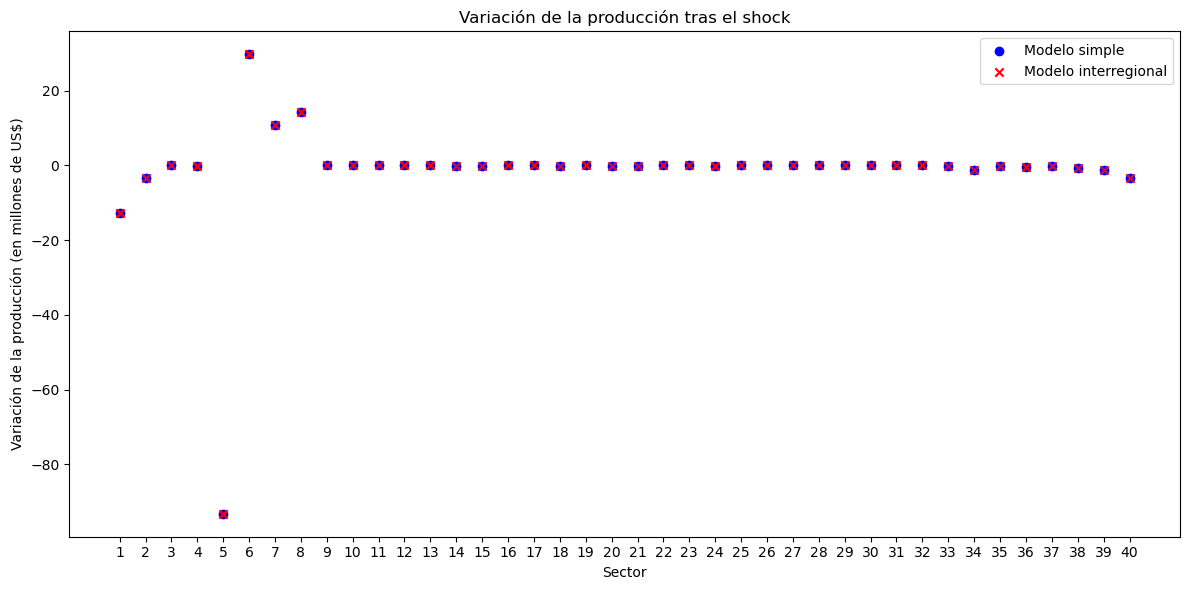

In [39]:
data = '../data/matrizlatina2011_compressed_0.xlsx'

p1 ='SLV'
p2= 'NIC'
df = generar_Matriz_InsumoProducto(p1, p2, data)
dp1, dp2 = obtener_demanda(p1, p2, df)
porcentaje_shock_sector = {5:-10,6:3.3,7:3.3, 8:3.3}
variacion_de_la_demanda = variacion_demanda(dp1, porcentaje_shock_sector)
A_p1p1, A_p1p2, A_p2p2, A_p2p1, producto_p1, producto_p2 = generar_submatrices(p1, p2, df)
variacion_compleja = variacion_produccion_modelo_complejo(A_p1p1, A_p1p2, A_p2p2, A_p2p1, variacion_de_la_demanda )
variacion_simple = variacion_produccion_modelo_simple(A_p1p1,variacion_demanda(dp1, porcentaje_sector))

sectores = np.arange(1,41)
indice = np.arange(40)

plt.figure(figsize=(12, 6))

plt.scatter(indice, variacion_simple, label='Modelo simple',color='blue', marker='o')
plt.scatter(indice, variacion_compleja, label='Modelo interregional',color='red', marker='x')

plt.xticks(indice, sectores)
plt.xlabel('Sector')
plt.ylabel('Variación de la producción (en millones de US$)')
plt.title('Variación de la producción tras el shock')
plt.tight_layout()
plt.legend()
plt.show()

Como es de esperarse, en ambos modelos los sectores que tuvieron un shock positivo tienen también una variación positiva de la producción. Mientras que el sector que sufrió un shock negativo tiene una disminución en la misma.  
Del gráfico se puede ver que prácticamente no hay diferencias entre usar el modelo simple y el interregional para calcular la variación de la producción del pais p1 (por lo menos en este caso) . De hecho, si se observa con cuidado la ecuación 5 se puede ver que es un caso particular de la 6 donde 

$$
A^{rs} (I - A^{ss})^{-1} A^{sr} = 0
$$

Con lo cual en este caso ese termino debe ser cercano al 0 (la matriz cero)